# Sets of Stairs in Pittsburgh Neighborhoods
### Eric Hart

The dataset that I chose to analyze is the number of stairsets in each neighborhood of Pittsburgh. The terrain of the city of Pittsburgh is what I would consider the opposite of flat, so in order to make it easier for pedestrians to navigate their neighborhoods, there are often stairsets that are installed to aid in mobility. So for this data set, I am going to consider more stairsets in a neighborhood as a positive.

The first thing that I am going to do for is import the necessary libraries needed for this analysis.

# Data Analysis

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

Alright, next I'm going to be initializing the dataset that I downloaded from WPRDC.org that contains [data regarding stairs in Pittsburgh.](https://data.wprdc.org/dataset/city-steps/resource/43f40ca4-2211-4a12-8b4f-4d052662bb64) The way that this will be initialized is through a pandas Dataframe.

In [2]:
stairData = pd.read_csv("city_of_pittsburgh_steps.csv")

I'll quickly grab a sample of the file in order to confirm that it is infact all there.

In [3]:
stairData.sample(10)

,_id,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
558,559,354493135,O'Hern St from Buena Vista St to Perrysville Ave,1st Division,1948-01-01,Concrete,450.0,140.0,NaN,NaN,...,Central Northside,6.0,25,42003261400,1,25,1,1-10,40.459967,-80.014157
783,784,727571286,W Sycamore From Amabell St to Merrimac St,DOMI - Signs and Markings,1946-01-01,Concrete,215.0,21.0,NaN,NaN,...,Mount Washington,2.0,19,42003190300,5,19,3,4-1,40.432886,-80.013921
347,348,36516302,Hemlock St from James St to Compromise St,1st Division,1948-01-01,Concrete,338.0,143.0,1.0,4.0,...,East Allegheny,1.0,25,42003563200,1,25,1,1-10,40.458309,-80.001504
931,1382,1685325583,Grandview Park 3,Parks - Western,NaN,Concrete,NaN,NaN,NaN,NaN,...,Allentown,3.0,18,42003180300,5,18,3,4-5,40.426516,-79.997096
589,590,278456178,Phelan Way to Paulowna St,3rd Division,1951-01-01,Concrete,116.0,50.0,1.0,8.0,...,Polish Hill,7.0,6,42003060500,6,6,2,2-6,40.456021,-79.967455
54,55,955299807,Beeler St at Olympia Way from Beeler St,3rd Division,NaN,Concrete,84.0,60.0,0.0,100.0,...,Squirrel Hill North,8.0,14,42003140100,3,14,4,2-26,40.445162,-79.934884
745,746,1962737818,Templeton St from W Liberty Ave to Woodward Ave,4th Division,NaN,Concrete,270.0,NaN,0.0,100.0,...,Brookline,4.0,19,42003191900,5,19,6,4-26,40.398765,-80.024763
510,511,199900323,Montana St from Grizella St to Swanson St,1st Division,1964-01-01,Concrete,100.0,47.0,0.0,100.0,...,Perry North,1.0,26,42003260200,1,26,1,1-15,40.493713,-80.017316
190,191,1674986827,E Burgess St from Perrysville Ave to Maple Ave,1st Division,NaN,Concrete,288.0,47.0,NaN,NaN,...,Perry South,6.0,26,42003261400,1,26,1,1-22,40.467652,-80.009261
279,280,452385538,Glenbury St at Railroad Underpass to Pinecastl...,4th Division,1947-01-01,Concrete,75.0,55.0,0.0,100.0,...,Overbrook,4.0,32,42003320700,5,32,3,4-25,40.383062,-79.997738


Wow look at that, isn't that awesome? No it isn't, there's too much data on my screen for me to comprehend. I'm going to filter out this data to only include the total number of stairsets in each neighborhood.

In [4]:
filterStairs = stairData.loc[:, ['number_of_steps', 'neighborhood']]
filterStairs.sample(10)

,number_of_steps,neighborhood
775,177.0,Troy Hill
610,55.0,Carrick
276,114.0,Sheraden
759,NaN,Hazelwood
305,45.0,Westwood
919,14.0,Perry North
993,46.0,Sheraden
710,35.0,Marshall-Shadeland
179,143.0,East Hills
837,109.0,Crawford-Roberts


Alright, now that that's a lot easier to digest, let's actually take a look at the data from two points of view. First, let's look at it from the perspective of an able-bodied person with the ability to effectively climb stairs. The first step of this is to determine how many stair-sets are in each area of Allegheny County.

In [5]:
len(filterStairs['neighborhood'].unique())
stairSets = dict()
totalSteps = dict()
for index, row in filterStairs.iterrows():
    current = row['neighborhood']
    if current not in stairSets:
        stairSets[current] = 1
    else:
        stairSets[current] += 1
dictStairs = pd.DataFrame.from_dict(stairSets, orient = 'index', columns = ['number_of_stair_sets'])
dictStairs.head(10)

,number_of_stair_sets
South Oakland,10
South Side Slopes,109
Bedford Dwellings,6
Polish Hill,20
Upper Lawrenceville,12
Stanton Heights,13
Squirrel Hill South,28
Sheraden,35
Greenfield,40
West Oakland,6


*[Holy Moly!](https://media.tenor.com/TmvqZuZdfqQAAAAC/holy-moly-holy.gif)* That's a lot of stair-sets in the South Side Slopes, however, for some additional context, I think it is best to also take into account the total number of steps across all stair-sets in Allegheny County, and we can do that with the `.concat` function built into pandas. This function combines two data frames with the same indices.

In [6]:
for index, row in filterStairs.iterrows():
    current = row['neighborhood']
    if current not in totalSteps and not(math.isnan(float(row['number_of_steps']))):
        totalSteps[current] = float(row['number_of_steps'])
    elif not(math.isnan(float(row['number_of_steps']))):
        totalSteps[current] += float(row['number_of_steps'])
dictTotal = pd.DataFrame.from_dict(totalSteps, orient = 'index', columns = ['total_steps'])
bothDict = pd.concat([dictStairs, dictTotal], axis = 1)
bothDict.head(10)

,number_of_stair_sets,total_steps
South Oakland,10,361.0
South Side Slopes,109,4795.0
Bedford Dwellings,6,291.0
Polish Hill,20,1109.0
Upper Lawrenceville,12,920.0
Stanton Heights,13,867.0
Squirrel Hill South,28,320.0
Sheraden,35,1223.0
Greenfield,40,1611.0
West Oakland,6,376.0


Alright we're getting somewhere, now, what I am going to do is create a sort of stair density metric to measure the average number of steps per stair-set in each neighborhood. First, this will be initialized as a list and then added to the dataframe as a column. I am then going to sort the table by showing the lowest concentration of stairs at the top. I feel that this is better than just looking at the total number of steps and the number of stair sets because in the case of Squirrel Hill South, while there are 28 stair sets, the total number of stairs is only 320, meaning that the average length for each stairset is quite short.

In [7]:
bothDict = bothDict.assign(average_steps_per_stair_set = bothDict.total_steps / bothDict.number_of_stair_sets)
bothDict = bothDict.sort_values(by='average_steps_per_stair_set', ascending = True)
bothDict.head(10)

,number_of_stair_sets,total_steps,average_steps_per_stair_set
Allegheny West,3,23.0,7.666667
Point Breeze North,2,16.0,8.000000
Windgap,2,16.0,8.000000
South Shore,2,16.0,8.000000
Manchester,1,8.0,8.000000
Regent Square,4,35.0,8.750000
Mount Oliver Borough,1,9.0,9.000000
Squirrel Hill South,28,320.0,11.428571
South Side Flats,8,95.0,11.875000
Allegheny Center,6,78.0,13.000000


Alright, now that we have our final table, let's graph this in order to more easily visualize the data. This bar graph will show the average steps per stair set for each neighborhood.

Text(0, 0.5, 'Steps per Stair-Set')

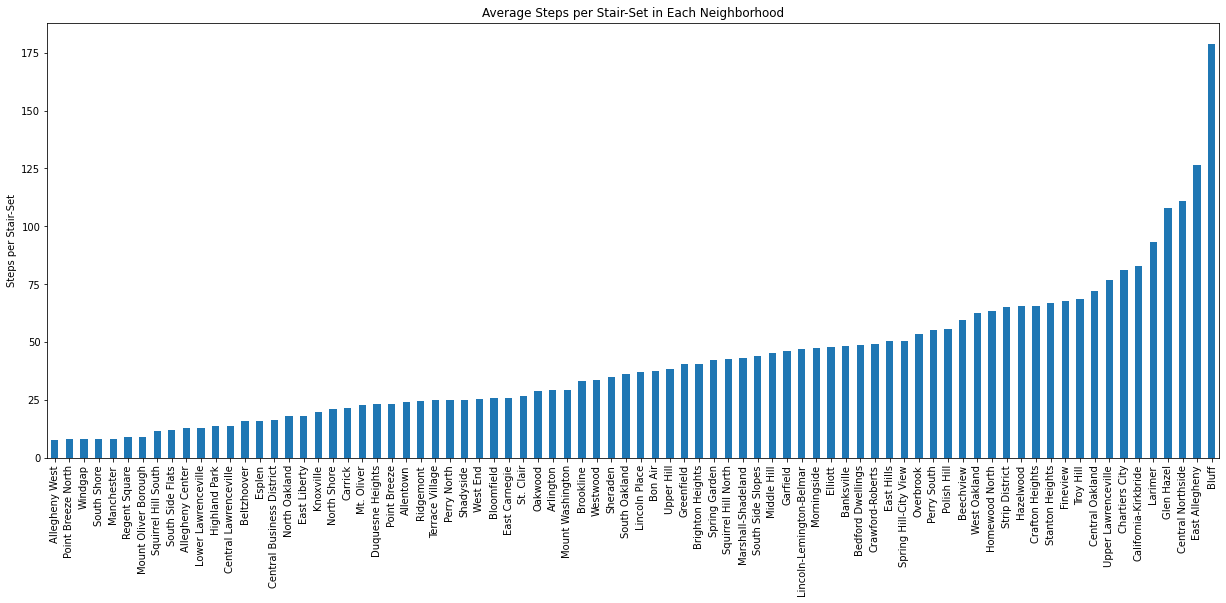

In [8]:
bothDict['average_steps_per_stair_set'].plot(kind = 'bar', figsize = (21, 8))
plt.title('Average Steps per Stair-Set in Each Neighborhood')
plt.ylabel('Steps per Stair-Set')

This graph is very informative, now let's dissect the information given into a nice little conclusion.

# Conclusion

When taking accessiblity into account, it is better for the average amount of stairs to be lower, as this means the neighborhood is a lot more flat. This means that **Allegheny West** would be considered the best neighborhood for those that are not physically able to climb stairs with an average stair set consisting of **7.66** stairs per set.

In [10]:
bothDict['average_steps_per_stair_set'].head(5)

Allegheny West        7.666667
Point Breeze North    8.000000
Windgap               8.000000
South Shore           8.000000
Manchester            8.000000
Name: average_steps_per_stair_set, dtype: float64

Using this same metric, we can determine that the worst neighborhood for those with limited mobility is **Bluff** with an average stair set consisting of **179** stairs per set.

In [11]:
bothDict['average_steps_per_stair_set'].tail(5)

Larimer               93.0
Glen Hazel           108.0
Central Northside    111.0
East Allegheny       126.5
Bluff                179.0
Name: average_steps_per_stair_set, dtype: float64